Import

In [1]:
from model import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Training reviews data shape (40000,) /t training sentiments shape (40000,)
Test reviews data shape (10000,) /t test sentiments shape (10000,)
BOW_cv_train: (40000, 6209089)
BOW_cv_test: (10000, 6209089)
Tfidf train reviews shape (40000, 6209089)
Tfidf test reviews shape (10000, 6209089)
sentiment data shape is (50000, 1)
Train Sentiment data is: [[1]
 [1]
 [1]
 ...
 [1]
 [0]
 [0]]
Test Sentiment data is: [[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
Bag of words model 
 LogisticRegression(C=1, max_iter=500, random_state=42)
TF-IDF model 
 LogisticRegression(C=1, max_iter=500, random_state=42)


## Prediction

In [2]:
## Predicting the model for bag of words
lr_bow_predict=lr.predict(cv_test_reviews)
print(f"Model prediction for Bag of words  \n {lr_bow_predict}")

## Predicting the model for tfidf features
lr_tfidf_predict=lr.predict(tv_test_reviews)
print(f"Model prediction for TF-IDF \n {lr_tfidf_predict}")

Model prediction for Bag of words  
 [0 0 0 ... 0 1 1]
Model prediction for TF-IDF 
 [0 0 0 ... 0 1 1]


# Evaluation

In [5]:
## Accuracy score for bag of words
lr_bow_score=accuracy_score(test_sentiments,lr_bow_predict)
print(f"Accuracy score for LR BOW model \t {lr_bow_score}")

## Accuracy score for tfidf features
lr_tfidf_score=accuracy_score(test_sentiments,lr_tfidf_predict)
print(f"Accuracy score for LR TF-IDF model \t {lr_tfidf_score}")

Accuracy score for LR BOW model 	 0.7512
Accuracy score for LR TF-IDF model 	 0.75


**Classification Report**

In [10]:
## Classification report for BOW 
lr_bow_report=classification_report(test_sentiments,lr_bow_predict,target_names=['Positive','Negative'])
print(f"Classification report for BOW: \n \n {lr_bow_report}\n")

## Classification report for tfidf features
lr_tfidf_report=classification_report(test_sentiments,lr_tfidf_predict,target_names=['Positive','Negative'])
print(f"Classification report for tfidf features: \n \n {lr_tfidf_report}")

Classification report for BOW: 
 
               precision    recall  f1-score   support

    Positive       0.75      0.75      0.75      4993
    Negative       0.75      0.75      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000


Classification report for tfidf features: 
 
               precision    recall  f1-score   support

    Positive       0.74      0.77      0.75      4993
    Negative       0.76      0.73      0.75      5007

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.75     10000
weighted avg       0.75      0.75      0.75     10000



In [12]:
## Confusion matrix for BOW
cm_bow=confusion_matrix(test_sentiments,lr_bow_predict,labels=[1,0])
print(f"Confusion matrix for BOW: \n {cm_bow} \n")

## Confusion matrix for tfidf features
cm_tfidf=confusion_matrix(test_sentiments,lr_tfidf_predict,labels=[1,0])
print(f"Confusion matrix for tfidf features: \n {cm_tfidf}")

Confusion matrix for BOW: 
 [[3768 1239]
 [1249 3744]] 

Confusion matrix for tfidf features: 
 [[3663 1344]
 [1156 3837]]


# Word Cloud

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

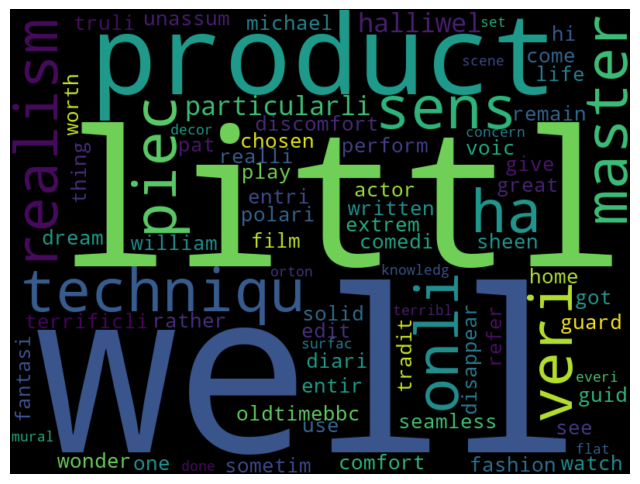

In [18]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[1]
WC=WordCloud(width=800,height=600,
             max_words=500,
             min_font_size=5)
positive_words=WC.generate(positive_text)

# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(positive_words,interpolation='bilinear')
plt.axis("off")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x1000 with 0 Axes>

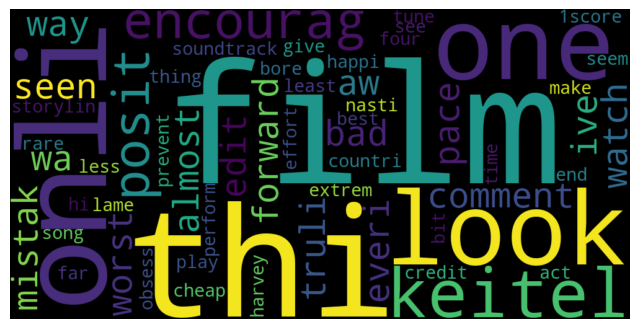

In [19]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[8]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(negative_words,interpolation='bilinear')
plt.axis("off")
plt.show